# Семинар 13

## Кластеризация цифр

Будем работать с набором данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

In [1]:
from sklearn import datasets
import numpy as np
import scipy.misc as misc
from matplotlib import pyplot as plt

In [2]:
digits = datasets.load_digits()

In [3]:
np.random.seed(13)
X, y = digits['data'], digits['target']

perm = np.random.choice(len(X), size=len(X), replace=False)
X, y = X[perm], y[perm]

Кластеризуем данные с помощью k-means:

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=10, random_state=13)
km.fit(X)
labels_ = km.predict(X)

In [10]:
np.unique(labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

Номера кластеров, которые были предсказаны алгоритмом, не имеют ничего общего с настоящими цифрами. Посмотрим, какая цифра представлена больше всего в нулевом кластере. Будем считать, что это кластер, соответствующий этой цифре.

In [6]:
max_digit = np.argmax(np.bincount(y[labels_ == 0]))
print('Most popular digit in 0 cluster: ', max_digit)

Most popular digit in 0 cluster:  5


Найдем объекты, которые по ошибке попали в этот класс. 

In [7]:
incorrect_indices = np.where(np.logical_and(labels_ == 0, y != max_digit))[0]

Визуализируем ошибочные изображения.

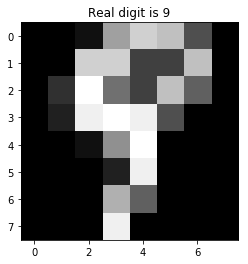

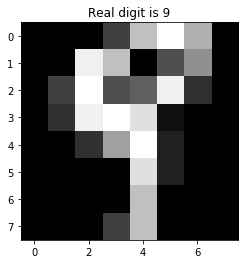

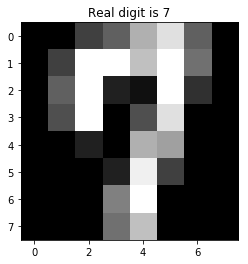

In [8]:
for i in range(3):
    plt.imshow(X[incorrect_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[incorrect_indices[i]]))
    plt.show()

Визуализируем изображения, соответствующие верной цифре.

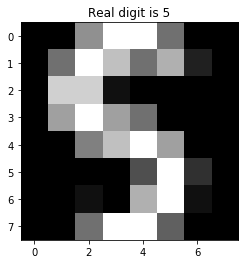

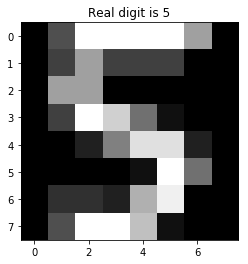

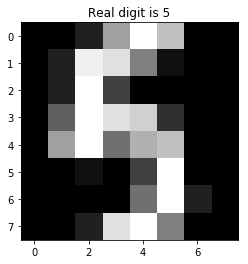

In [11]:
correct_indices = np.where(np.logical_and(labels_ == 0, y == max_digit))[0]

for i in range(3):
    plt.imshow(X[correct_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[correct_indices[i]]))
    plt.show()

Посчитаем метрики качества кластеризации. Существует достаточно много способов оценить качество кластеризации. Также существуют метрики, которые используют знания об истинном разбиении, но есть и метрики, которые это не используют. Одной из метрик, использующих истинное разбиение, является [homogeneity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html). Пример метрики, которая не использует истинное разбиение: [silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).

In [12]:
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.cluster import DBSCAN

**Задание**

Найдите количество кластеров, максимизирующих данные метрики.

**Задание**

Воспользуйтесь алгоритмом DBSCAN для данной задачи и подберите оптимальный параметр eps. Сколько кластеров находит алгоритм? Визуализируйте шум с помощью кода выше.

### Визуализация кластеризации.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, Birch
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_X = pca.fit_transform(X)
sne_X = tsne.fit_transform(X)

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y == i
    plt.plot(sne_X[bit_mask, 0], sne_X[bit_mask, 1], 'v', label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with true coloring')
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y == i
    plt.plot(pca_X[bit_mask, 0], pca_X[bit_mask, 1], 'v', label=i,
               alpha=0.5)

plt.legend()
plt.title('PCA projection with true coloring')
plt.show()

In [ ]:
dbs = DBSCAN(eps=1.7, min_samples=10)
y_hat = dbs.fit_predict(pca_X)

plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y_hat == i
    plt.plot(pca_X[bit_mask, 0], pca_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('PCA projection with DBSCAN coloring')
plt.show()

In [ ]:
dbs = DBSCAN(eps=7, min_samples=60)
y_hat = dbs.fit_predict(sne_X)

plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y_hat == i
    plt.plot(sne_X[bit_mask, 0], sne_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with DBSCAN coloring')
plt.show()

**Задание**

Проделайте тоже самое для k-means. Какие результаты у вас получаются относительно DBSCAN? 

**Задание** 

Проведите кластеризацию цифр в исходном пространстве, но визуализируйте результат на проекции. Лучше или хуже получается относительно кластеризации в двумерном пространстве? Используйте гиперпараметры, подобранные в первой части семинара.

### Бонус

Каждый из предложенных алгоритмов будет выдавать различные результаты в зависимости от сида, либо от перестановки данных. Это происходит из-за случайных инициализаций или из-за жадной стратегии, которая работает внутри метода. 

Вы уже знаете, что такое бутстрэп. Запуская один и тот же алгоритм с различными бутстрэпными подвыборками, мы будем получать различные результаты. Посчитав дисперсию получаемых результатов, мы сможем оценить нашу уверенность в получаемых значениях.

1. Проведите кластеризацию на 100 бутстрэпных подвыборках, посчитайте метрики качества.
2. Посчитайте дисперсию полученных векторов.
3. Сделайте выводы.